In [1]:
# take a look of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
# read the txt file into a dataframe, give the column names ['timestamp','nodeid','temperature','humidity','light','voltage']
raw_data = pd.read_csv('./data/labapp3-data-new.txt', sep=' ', names=['timestamp','nodeid','temperature','humidity','light','voltage'])

In [61]:
# remove first row
data = raw_data[1:]
# use the first 1000 rows for the analysis
# data = data[:100000]
data

,timestamp,nodeid,temperature,humidity,light,voltage
1,30,19.0,19.7336,37.0933,71.76000,2.69964
2,30,25.0,19.6160,37.5737,97.52000,2.69964
3,30,24.0,19.7728,37.1620,143.52000,2.71196
4,30,3.0,20.2040,36.8871,50.60000,2.69964
5,30,28.0,19.0476,40.0945,NaN,2.80151
...,...,...,...,...,...,...
2313677,3232930,56.0,23.4968,35.8530,0.04022,2.81479
2313678,3232960,56.0,23.4968,35.8530,0.04022,2.81479
2313679,3232990,56.0,23.4772,35.8530,0.04022,2.82819
2313680,3233020,56.0,23.4968,35.8530,0.04022,2.81479


In [63]:
# find duplicated rows
duplicated = data[['timestamp','nodeid']].duplicated(keep=False)
data[duplicated]


,timestamp,nodeid,temperature,humidity,light,voltage
48699,49530,46.0,23.8398,33.8744,566.72,2.54901
48701,49530,2.0,23.4380,34.8834,426.88,2.71196
48704,49530,46.0,23.8398,33.8744,566.72,2.54901
48705,49530,2.0,23.4380,34.8834,426.88,2.71196
48710,49530,27.0,25.4470,29.6139,279.68,2.74963
...,...,...,...,...,...,...
2312325,2929560,25.0,122.1530,-4.0000,128.80,2.02703
2312910,2932120,24.0,NaN,NaN,NaN,2.16759
2312912,2932120,24.0,122.1530,-4.0000,195.04,2.07664
2312985,2932710,34.0,NaN,NaN,NaN,2.12875


In [64]:
# drop duplicates
# find duplicated rows and only keep the last one
duplicated = data[['timestamp','nodeid']].duplicated(keep='last')
data = data[~duplicated]


In [65]:
# check unique values
print('unique nodeid:', len(data['nodeid'].unique()))
print('unique timestamp:', len(data['timestamp'].unique()))

unique nodeid: 62
unique timestamp: 210858


In [70]:
data.describe()

,timestamp,nodeid,temperature,humidity,light,voltage
count,2.309472e+06,2.308947e+06,2.308580e+06,2.308579e+06,2.215706e+06,2.308947e+06
mean,1.215722e+06,2.854674e+01,3.920371e+01,3.391104e+01,4.071182e+02,2.492547e+00
std,7.887288e+05,5.066681e+01,3.741828e+01,1.732852e+01,5.394521e+02,1.795753e-01
min,3.000000e+01,1.000000e+00,-3.840000e+01,-8.983130e+03,0.000000e+00,9.100830e-03
25%,5.454500e+05,1.700000e+01,2.040980e+01,3.187760e+01,3.956000e+01,2.385220e+00
50%,1.148270e+06,2.900000e+01,2.243840e+01,3.928030e+01,1.582400e+02,2.527320e+00
75%,1.834080e+06,4.100000e+01,2.701500e+01,4.358550e+01,5.372800e+02,2.627960e+00
max,3.233050e+06,6.540700e+04,3.855680e+02,1.375120e+02,1.847360e+03,1.856000e+01


In [71]:
# describe missing values
missing = data.isnull().sum()
print('missing values:\n', missing)
# print missing values in table format


missing values:
 timestamp          0
nodeid           525
temperature      892
humidity         893
light          93766
voltage          525
dtype: int64


<Axes: >

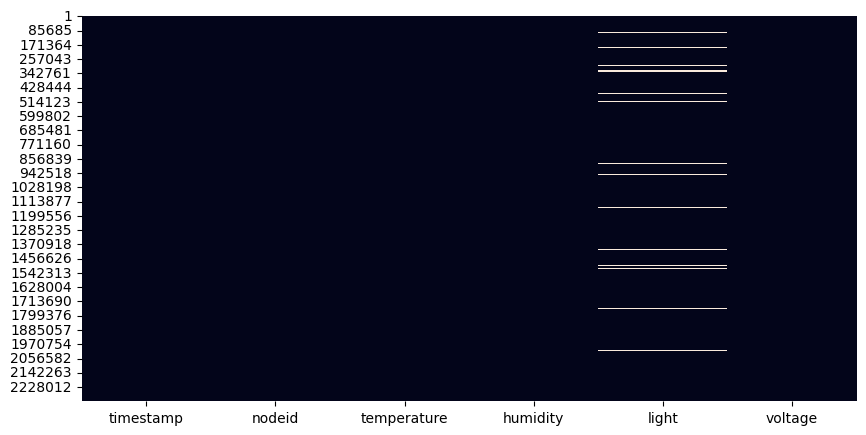

In [37]:
# plot missing
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False)

In [72]:
# drop missing nodeid
data = data.dropna(subset=['nodeid'])
missing = data.isnull().sum()
print('missing values:\n', missing)

missing values:
 timestamp          0
nodeid             0
temperature      367
humidity         368
light          93241
voltage            0
dtype: int64


In [73]:
# count the number of records for each nodeid
# nodeid to int
data['nodeid'] = data['nodeid'].astype(int)
nodeid_count = data['nodeid'].value_counts().sort_index()
nodeid_count    

/tmp/ipykernel_1942994/1646995272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nodeid'] = data['nodeid'].astype(int)


nodeid
1        42995
2        46824
3        46560
4        43726
5           35
         ...  
57           3
58        4501
6485         1
33117        1
65407        1
Name: count, Length: 61, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 

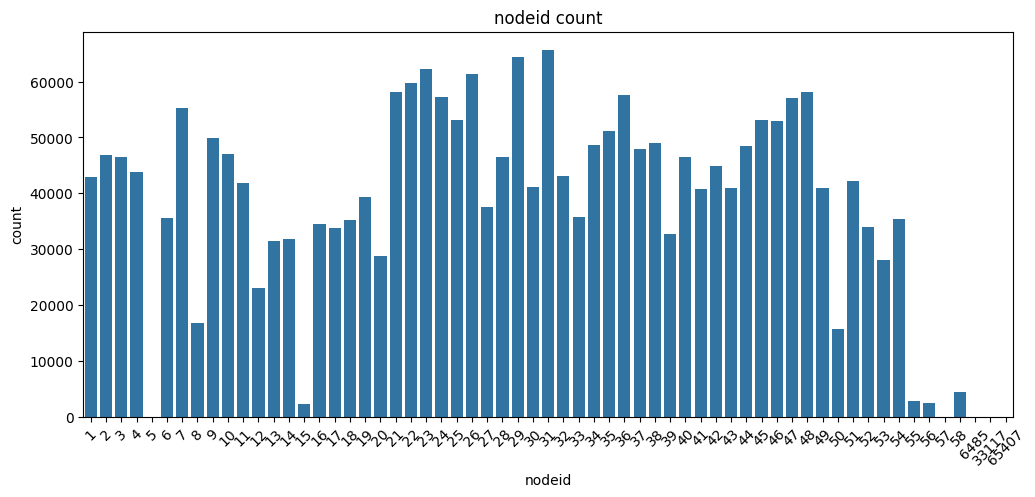

In [74]:
# plot nodeid count
plt.figure(figsize=(12, 5))
sns.barplot(x=nodeid_count.index, y=nodeid_count.values)
plt.xlabel('nodeid')
plt.ylabel('count')
plt.title('nodeid count')
# xticks 45 degree
plt.xticks(rotation=45)

In [75]:
# check subset duplicates
data_subset = data[['timestamp','nodeid','temperature','humidity','voltage','light']]
print(data_subset.shape)
# remove duplicates
data_subset = data_subset.drop_duplicates()
print(data_subset.shape)

(2308947, 6)
(2308947, 6)


In [76]:
# select nodeid ==3
data_subset = data[data['nodeid']==3]
duplicated = data_subset.duplicated()


<Axes: xlabel='timestamp', ylabel='nodeid'>

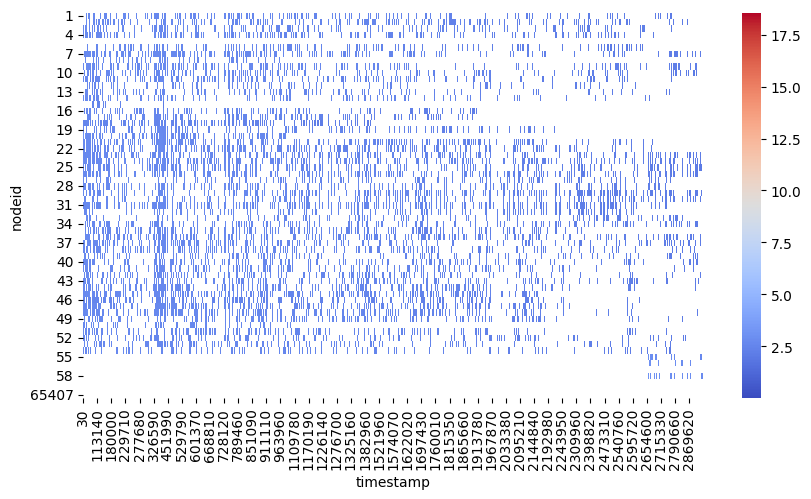

In [79]:
# plot the data as heat map using nodeid as y-axis and timestamp as x-axis
# the color represents the voltage
# the data is not sorted by nodeid

plt.figure(figsize=(10,5))
sns.heatmap(data.pivot(index='nodeid', columns='timestamp', values='voltage'), cmap='coolwarm')

In [54]:
# the max timestamp
max_timestamp = data['timestamp'].max()

In [55]:
# timestamp is in seconds, convert it to hours
max_hour = max_timestamp / 3600
print('max hour:', max_hour)

max hour: 898.0694444444445


In [56]:
# to days
max_day = max_hour / 24
print('max day:', max_day)

max day: 37.41956018518518
